In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Image Preprocessing
- ### resize the images in order to feed them to the network (64 x 64)
- ### split the provided training set in 85% for actual training set and 15% to be used as validation set

In [3]:
image_size = (64, 64)
class_names=['Bedroom', 'Coast', 'Forest', 'Highway', 'Industrial', 'InsideCity', 'Kitchen', 'LivingRoom', 'Mountain', 'Office', 'OpenCountry', 'Store', 'Street', 'Suburb', 'TallBuilding']
num_classes = len(class_names)

train_ds = keras.preprocessing.image_dataset_from_directory(
    directory="dataset/train",
    color_mode="grayscale",
    class_names=class_names,
    validation_split=0.15,
    subset="training",
    shuffle=True,
    seed=1849,
    image_size=image_size,
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    directory="dataset/train",
    color_mode="grayscale",
    class_names=class_names,
    validation_split=0.15,
    subset="validation",
    shuffle=True,
    seed=1849,
    image_size=image_size,
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    directory="dataset/test",
    color_mode="grayscale",
    class_names=class_names,
    validation_split=None,
    subset=None,
    shuffle=True,
    seed=1849,
    image_size=image_size,
)

Found 1500 files belonging to 15 classes.
Using 1275 files for training.
Found 1500 files belonging to 15 classes.
Using 225 files for validation.
Found 2985 files belonging to 15 classes.


## Visualization of the first 9 images in the training dataset, with the correspondent label

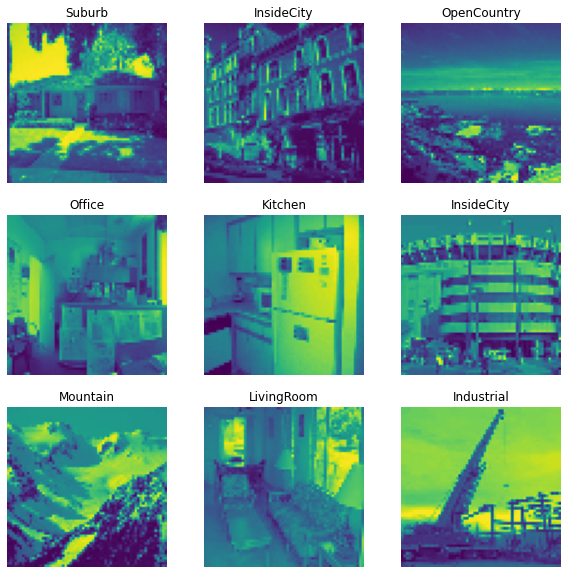

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

## Layout of the CNN
- ### initial weights drawn from a Gaussian distribution with a mean of 0 and a standard deviation of 0.01
- ### initial bias values to 0
- ### employ the stochastic gradient descent with momentum (SGD) optimization algorithm using minibatches of size 32

| Type    | Size |
| ----------- | ----------- |
| Image Input   | 64×64×1 images|
| Convolution   | 8 3×3 convolutions with stride 1        |
| ReLU   |         |
| Max Pooling   | 2×2 max pooling with stride 2        |
| Convolution   | 16 3×3 convolutions with stride 1        |
| ReLU   |         |
| Max Pooling   | 2×2 max pooling with stride 2        |
| Convolution   | 32 3×3 convolutions with stride 1        |
| ReLU   |         |
| Fully Connected   | 15        |
| Softmax   | softmax        |
| Classification Output   | crossentropyex        |

## Building the CNN model

In [5]:
bias_init = initializers.Zeros()
weight_init = initializers.RandomNormal(mean=0, stddev=0.01)

model = keras.Sequential()

model.add(layers.InputLayer(input_shape=image_size + (1,)))
model.add(layers.Conv2D(filters=8, kernel_size=(3,3), strides=1, bias_initializer=bias_init, kernel_initializer=weight_init))

model.add(layers.Activation(activations.relu))

model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(filters=16, kernel_size=(3,3), strides=1, bias_initializer=bias_init, kernel_initializer=weight_init))

model.add(layers.Activation(activations.relu))

model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, bias_initializer=bias_init, kernel_initializer=weight_init))

model.add(layers.Activation(activations.relu))

model.add(layers.Flatten())
model.add(layers.Dense(units=num_classes, bias_initializer=bias_init, kernel_initializer=weight_init))

model.add(layers.Softmax())

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         80        
_________________________________________________________________
activation (Activation)      (None, 62, 62, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4

## Compiling the model with SGD optimizer and crossentropy loss

In [7]:
opt = optimizers.SGD() # default parameters: learning_rate=0.01, momentum=0.0

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

## Training the model

In [8]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15,
restore_best_weights=True)

minibatches = 32
epochs = 100

model_train = model.fit(train_ds, validation_data=val_ds, batch_size=minibatches, epochs=epochs,
callbacks=[early_stopping], verbose=1)

Epoch 1/100
40/40 [==============================] - 2s 49ms/step - loss: 2.7078 - accuracy: 0.0569 - val_loss: 2.7077 - val_accuracy: 0.0444
Epoch 2/100
40/40 [==============================] - 1s 30ms/step - loss: 2.7070 - accuracy: 0.0550 - val_loss: 2.7075 - val_accuracy: 0.0622
Epoch 3/100
40/40 [==============================] - 1s 32ms/step - loss: 2.7052 - accuracy: 0.0657 - val_loss: 2.7061 - val_accuracy: 0.0533
Epoch 4/100
40/40 [==============================] - 1s 31ms/step - loss: 2.7003 - accuracy: 0.0636 - val_loss: 2.6978 - val_accuracy: 0.0622
Epoch 5/100
40/40 [==============================] - 1s 30ms/step - loss: 2.6857 - accuracy: 0.0743 - val_loss: 2.6883 - val_accuracy: 0.1111
Epoch 6/100
40/40 [==============================] - 1s 30ms/step - loss: 2.6787 - accuracy: 0.0862 - val_loss: 2.7027 - val_accuracy: 0.1156
Epoch 7/100
40/40 [==============================] - 1s 30ms/step - loss: 2.6857 - accuracy: 0.1179 - val_loss: 2.7029 - val_accuracy: 0.0844
Epoch 

## Discussion on loss and accuracy

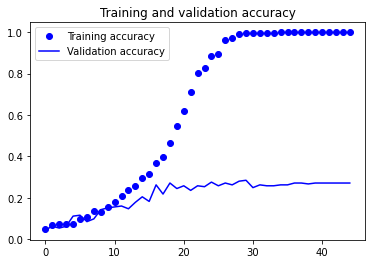

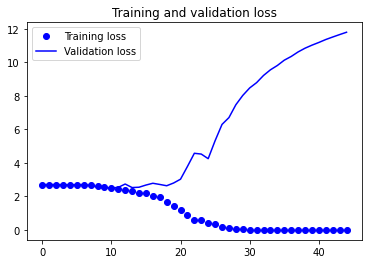

In [9]:
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

As we can see from the plots, the training accuracy increases after every epoch as expected.

Consequently, the training loss tends to decrease after every epoch as expected.

This information means that our model can fit the training data better than the same model trained for less epochs, with all the other parameters fixed.

The overfitting is fought by (in a first approximation): the limited number of epochs set previously, the learning rate, the early stopping criteria.

The validation accuracy has some fluctuations, and the increase rate is small.

Notice the huge gap between training accuracy and validation accuracy.

This gap means that the model fits too much the training data hence, there is a weak generalization.

We can't expect too much from a simple model like this one.

## Model evaluation on test set

In [10]:
test_eval = model.evaluate(test_ds, verbose=0)
print('Overall Test accuracy: {number:.{digits}f}'.format(number=test_eval[1], digits=2))

Overall Test accuracy: 0.27


## Confusion matrix

In [11]:
y_pred = model.predict(test_ds, verbose=0)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_ds], axis=0)

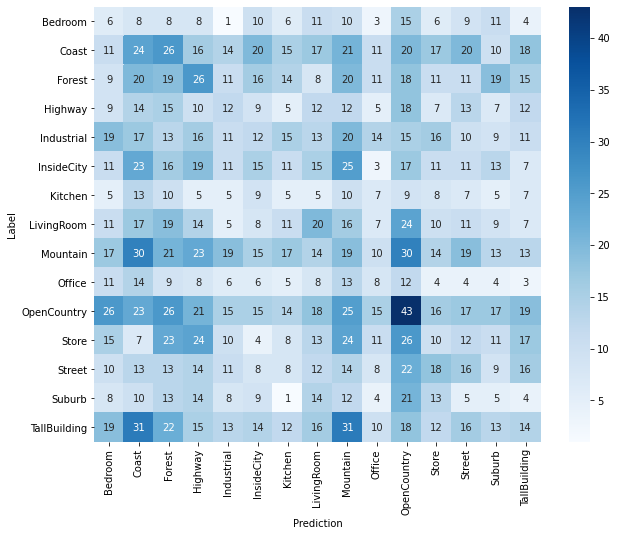

In [12]:
confusion_mtx = tf.math.confusion_matrix(true_categories, predicted_categories) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names,
            annot=True, fmt='g', cmap=plt.cm.Blues)
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()